# Tutorial
**Simple PLOTs, Contours and Histograms is a small package with wrapper functions designed to facilitate simplified, concise calls to matplotlib plotting.**

The general mantra of SPLOTCH is that plotting calls should require only a single line of code to manifest rather than requiring the user to manually specify each aspect of a plot individually (e.g. axes.set_xlim(), axes.set_title(), axes.set_xlabel(), etc.). SPLOTCH is designed to be a <i>superset</i> of matplotlib.pyplot, given you all the functionality that already exists, plus some useful, intuitive shortcuts.

## Standard plotting functions

### Simple plot using matplotlib
The simplest plot one can make is a series of y data against some x data. Producing this in `matplotlib` might look something like the following.

In [1]:
# Import some standard libraries
import numpy as np
# Import matplotlib
import matplotlib.pyplot as plt

import matplotlib

In [2]:
matplotlib.rcParams['figure.facecolor'] = 'white' # my own fudge for notebooks :/
matplotlib.rcParams['figure.figsize'] = (14,6) # increased figure size
matplotlib.rcParams['font.size'] = 18 # increased font size

In [3]:
# Create some fake data
xdata = np.linspace(0.0,10.0,num=200) + np.random.random(size=200)/10.0
ydata = xdata**3 - 8*xdata**2 + np.random.normal(0.0,20.0,size=200)
cdata = 3*np.sin(xdata*2) + 0.2*abs(ydata)

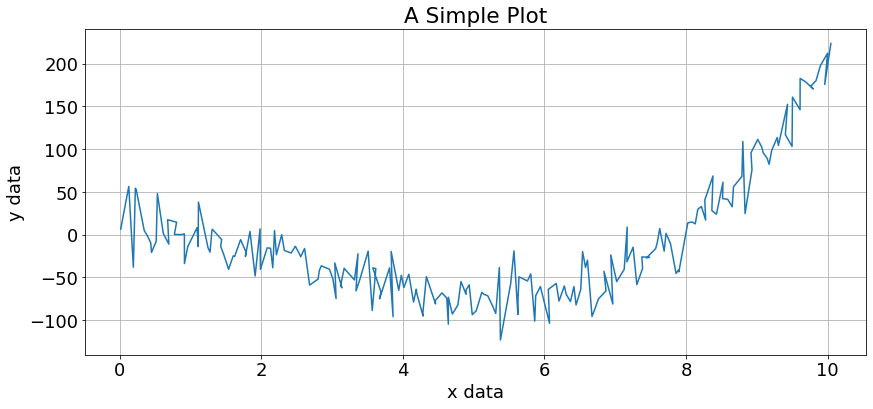

In [4]:
fig, ax = plt.subplots()

#####  MATPLOTLIB USAGE  #####
#--------------------------------------------------------#
ax.plot(xdata,ydata)

ax.set_xlabel("x data")
ax.set_ylabel("y data")
ax.set_title("A Simple Plot")

ax.grid(True)
#--------------------------------------------------------#

plt.show()

Now, using SPLOTCH we can replicate the above matplotlib plot in just a single call to SPLOTCH. **Same outcome,  just one line.**

In [5]:
# import SPLOTCH
import splotch as splt

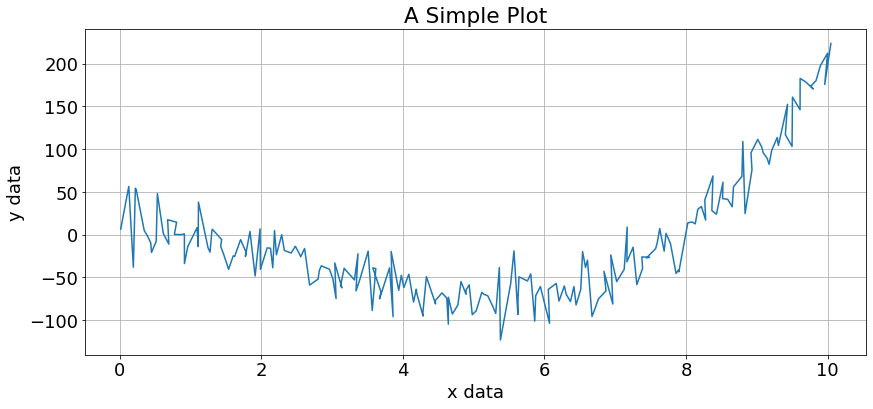

In [6]:
fig, ax = plt.subplots()

#####  SPLOTCH USAGE  #####
#--------------------------------------------------------#
splt.plot(xdata,ydata,xlabel="x data",ylabel="y data",title="A Simple Plot",grid=True)
#--------------------------------------------------------#

plt.show()

### Basic histograms
The same goes for producing basic 1D histograms with SPLOTCH - one line is all it takes. There are also some useful ways to assign binning of the histrogram.

In [7]:
# Create an array with some random distribution
data = np.append(np.random.normal(5.0,2.5,size=1000), np.random.normal(10.0,0.5,size=1000))

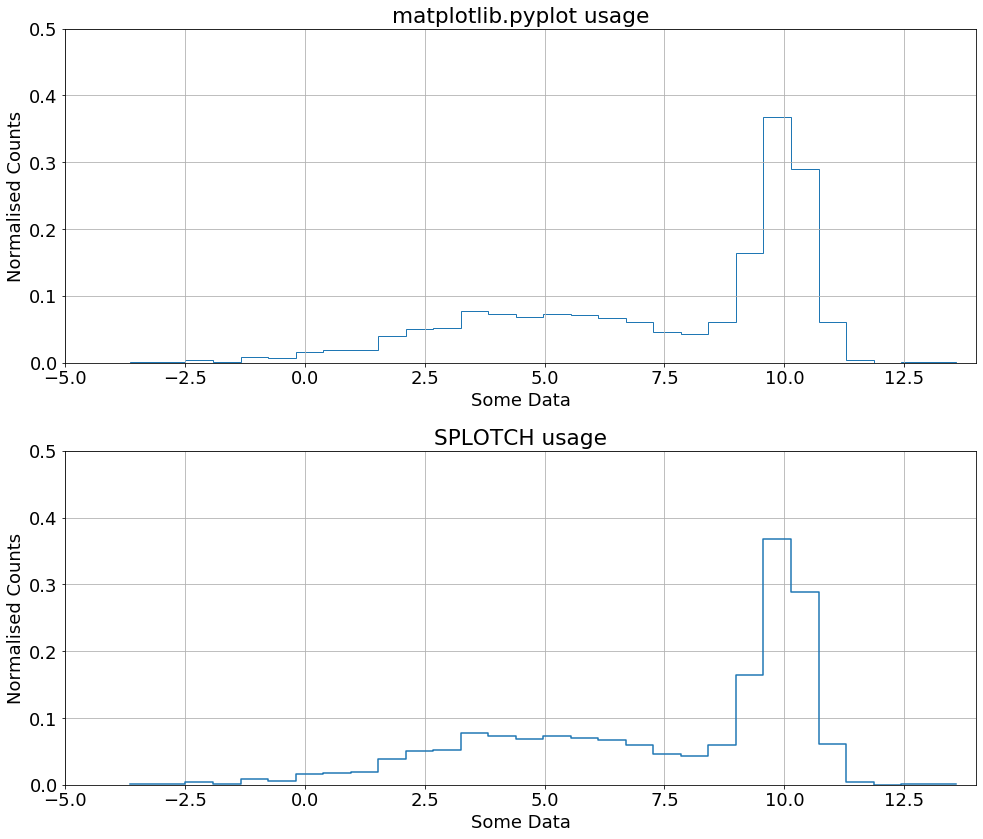

In [8]:
fig, (axes1, axes2) = plt.subplots(ncols=1,nrows=2,figsize=(14,12))


#####  MATPLOTLIB USAGE  #####
#--------------------------------------------------------#
axes1.hist(data,bins=30,density=True,histtype='step')

axes1.set_xlim(-5,14)
axes1.set_ylim(0,0.5)

axes1.grid(True)
axes1.set_xlabel("Some Data")
axes1.set_ylabel("Normalised Counts")
axes1.set_title("matplotlib.pyplot usage")
#--------------------------------------------------------#


#####  SPLOTCH USAGE  #####
#--------------------------------------------------------#
splt.hist(data,bins=30,ax=axes2,xlim=(-5,14),ylim=(0,0.5),dens=True,
          xlabel="Some Data",ylabel="Normalised Counts",title="SPLOTCH usage",grid=True)
#--------------------------------------------------------#

plt.tight_layout()
plt.show()

`splotch.hist()` passes some extra options in addition to what the `matplotlib.hist()` function offers. Using `hist_style`, lines can be drawn in three different styles: `step` (based on `pyplot.step`), `line` (`pyplot.plot`) and `bar` (`pyplot.bar`). Furthermore, each one of these has a filled varient, adding `filled` to the type name (e.g., `stepfilled`).

Besides the standard options of specifying bins by either number, width or edges, there is the option `bin_type` which, when set to `equal`, automatically produces a binning scheme where each bin has approximately the same number of elements. Note that this options, while sensible when using `dens=True` for high sampling of dense regions while avoiding noisy results in sparse regions, is quite uninformative when used for raw counts (`dens=False`).

If `cumul=True`, this will instead produce a cumulative histogram.
Finally, the `scale` parameter allows the scaling up/down of values in the resulting histogram. Note that in combination with `dens=True` it changes the type of histogram shown, from a PDF to histogram where (if `scale=1`) the area under the curve equates to the number of datapoints.

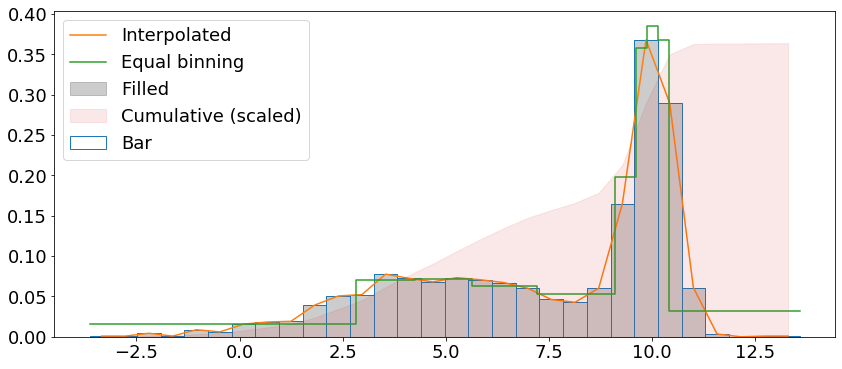

In [9]:
splt.hist(data,bins=30,xlim=(-5,14),ylim=(0,0.5),dens=True,hist_type='stepfilled',
          plabel='Filled',alpha=0.2,color='k')
splt.hist(data,bins=30,dens=True,hist_type='bar',plabel='Bar')
splt.hist(data,bins=30,dens=True,hist_type='line',plabel='Interpolated')
splt.hist(data,bins=10,dens=True,bin_type='equal',plabel='Equal binning')
splt.hist(data,bins=30,dens=True,cumul=True,scale=5500,hist_type='linefilled',
          plabel='Cumulative (scaled)',alpha=0.1,zorder=3,color='C3')

plt.show()

### 2D Images and Colourbars
SPLOTCH has a fairly simple wrapper around the currently available `pyplot.imshow()` (or `plt.matshow()`) function but with some additional useful utilities. Colour bars can be tedious to create in standard matplotlib usage as they must be done after-the-fact. In SPLOTCH, you can turn on colour bars within most 2D functions simply by setting `clabel` and can also make use of paramters such as `clog`, `clim`, `cmap`, `cbar_invert`, etc.

In [10]:
### Create an image of a 2D Gaussian
X, Y = np.meshgrid(np.linspace(-1,1,25),np.linspace(-1,1,25))
img = 5*np.exp(-((X)**2+(Y)**2)/2.0 * 2.0**2)

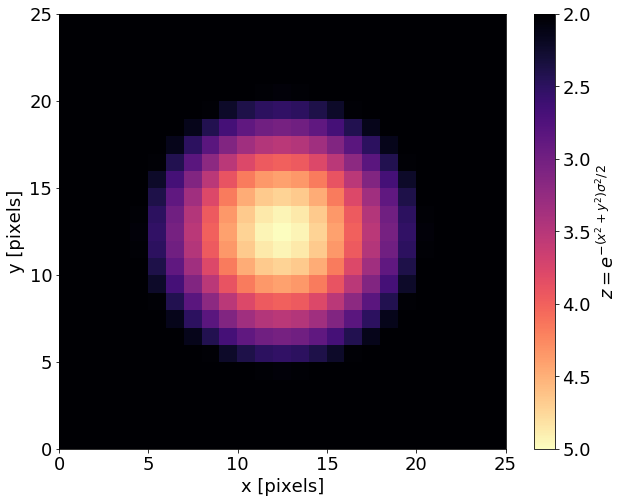

In [11]:
fig, axes = plt.subplots(figsize=(10,8))

splt.img(img,clim=(2,5),cbar_invert=True,cmap="magma",
         xlabel="x [pixels]",ylabel="y [pixels]",clabel="$z = e^{-(x^2 + y^2)\\sigma^2/2}$")

plt.show()

### 2D histograms
With SPLOTCH, binning two-dimensional data to produce density distributions or calculating statistics (means, medians, etc.) simultaneously across two axes has never been easier! Simply using the `splotch.hist2D` will provide all the necessary functionality of working with data in two-dimensions.

In [12]:
# Create some data representing two multi-variate 2D Gaussians
num = 10000
xvals, yvals = np.append(np.random.multivariate_normal([5,10],[[2,1],[1,2]],size=num//2).T,
                         np.random.multivariate_normal([8,6],[[2,0],[0,2]],size=num//2).T,axis=1) 
cvals = xvals+yvals

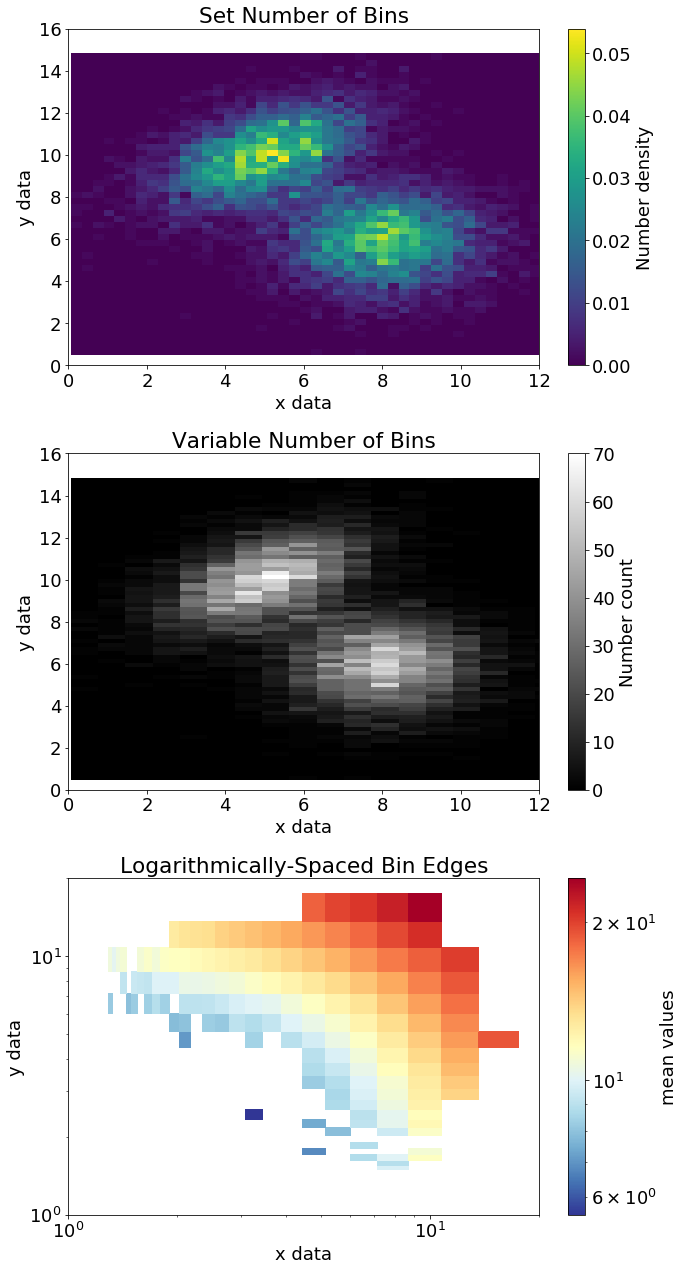

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(10,18))

# A set number of bins across both axes
splt.hist2D(xvals, yvals, xlim=(0,12), ylim=(0,16), bins=50, 
            xlabel="x data",ylabel="y data",clabel="Number density",
            title="Set Number of Bins",ax=axes[0])

# Different numbers of bins for each axis
splt.hist2D(xvals, yvals, xlim=(0,12), ylim=(0,16), dens=False, bins=[20,75],
            xlabel="x data",ylabel="y data",clabel="Number count",
            title="Variable Number of Bins",
            cmap='gray',ax=axes[1])

# Array defining arbitrarily-spaced bin edges (e.g. logarithmic below)
splt.hist2D(xvals, yvals, c=cvals, xlim=(1,20), ylim=(1,20), dens=False,
            bins=np.logspace(-1,2,num=75),clog=True,xlog=True,ylog=True,cstat='mean',
            xlabel="x data",ylabel="y data",clabel="mean values",
            title="Logarithmically-Spaced Bin Edges",cmap='RdYlBu_r',ax=axes[2])

fig.tight_layout()
plt.show()

### Binned statistics
Both `splotch.hist` and `splotch.hist2D` provide the option of making binned statistics. This is done passing the kwarg `v` or `c`, respectively. The kwarg `vstat`/`cstat` control the type of statistic to be used, and accepts the same inputs as `scipy.stats.binned_statistic`.

In [14]:
x=np.random.normal(2,1,10000)
y=np.random.gamma(4,0.5,10000)
z=np.cos(x*y)

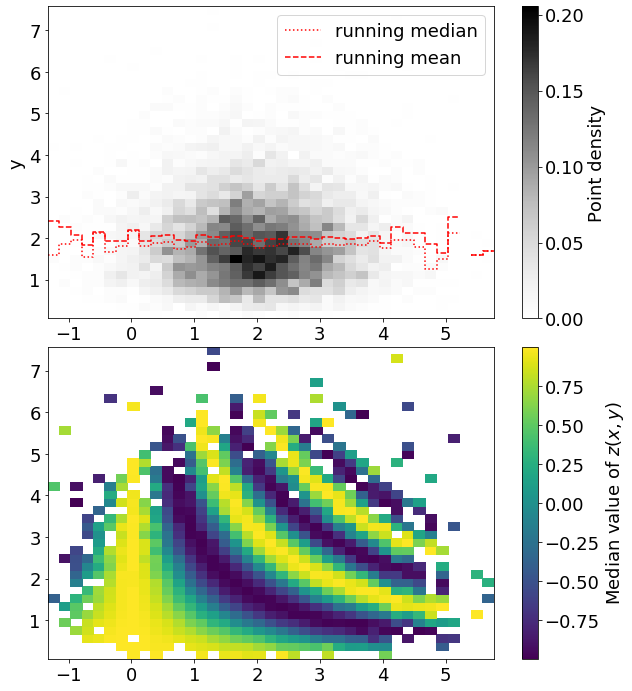

In [15]:
fig, axes = splt.subplots(nrows=2,figsize=(10,12))

splt.hist([x]*2,v=[y]*2,vstat=['median','mean'],plabel=['running median','running mean'],color='r',
          linestyle=['dotted','dashed'], ax=axes[0])
splt.hist2D(x,y,cmap='Greys',xlabel='x',ylabel='y',clabel='Point density', ax=axes[0])

splt.hist2D(x,y,c=z,cstat='median',clabel='Median value of $z(x,y)$', ax=axes[1])
plt.show()

### Scatter Plots
Here is a general usage of the SPLOTCH scatter plot function.

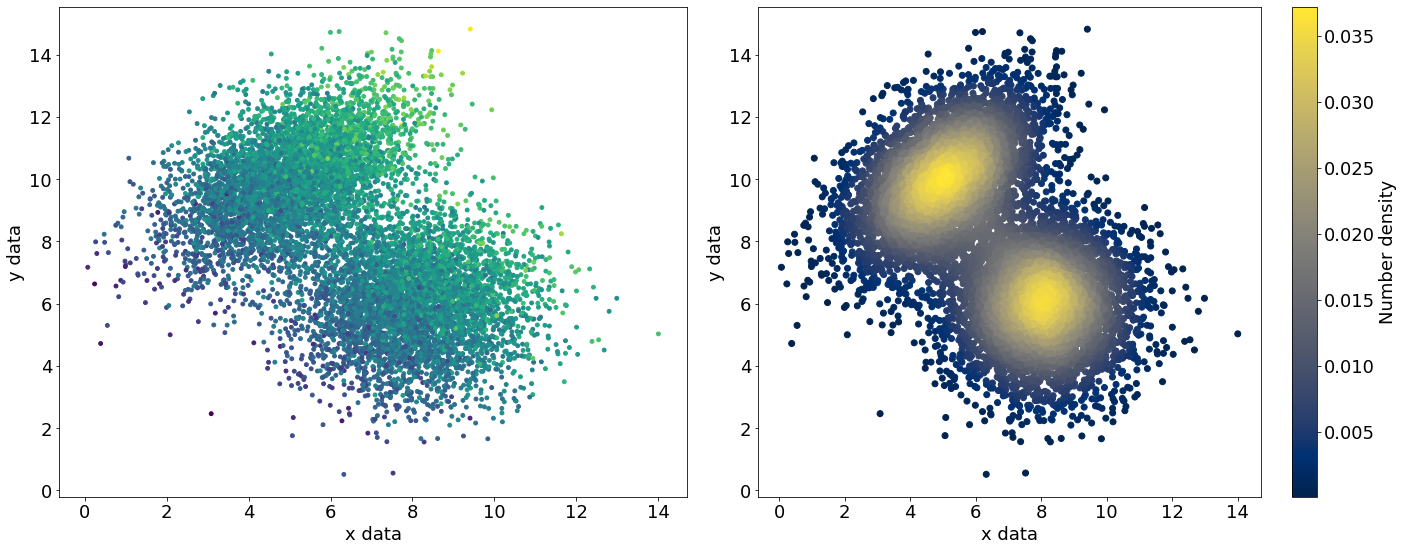

In [16]:
fig, axes = splt.subplots(ncols=2,figsize=(20,8))

splt.scatter(x=xvals,y=yvals,c=cvals+np.random.normal(0,2,size=len(cvals)),ax=axes[0],
             xlabel="x data",ylabel="y data",s=15)

splt.scatter(x=xvals,y=yvals,density=True,ax=axes[1],
             xlabel="x data",ylabel="y data",clabel="Number density",
             cmap='cividis')

fig.tight_layout()
plt.show()

## SPLOTCH-specific plots
SPLOTCH, as well as adding convenience wrappers around various matplotlib.pyplot functions, also has a series of its own plotting functions for various uses. These include, percentile contours, sector plots, broken axes, etc.

## splotch.contourp()
#### Percentile Contour Plots: 
Here is the SPLOTCH percentile contours function which, given some x and y data, will create contours around specified percentiles of the two-dimensional distribution.

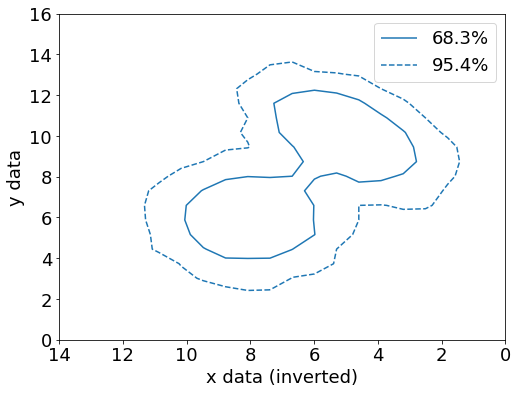

In [17]:
fig, axes = plt.subplots(figsize=(8,6))

splt.contourp(xvals,yvals,bins=[20,20],labels=True,
                xinvert=True,yinvert=False,xlim=(0,14),ylim=(0,16),
                xlabel="x data (inverted)",ylabel="y data")

plt.show()

## splotch.contourp()
#### Further controls
The contours above encircle 68% and 95% of the number density of particles in bins along the x- and y-axis.

Further control to the contours can be made by parsing a list of percentages to the `percent` parameter. Instead of using different linestyles for the contours and in the example above, a colormap can be mapped onto the contours drawn using `cmap`.

If the bins are too finely, the resulting contours with appear quite jagged. This can be improved using the `smooth` parameter to apply a Gaussian kernel filter.

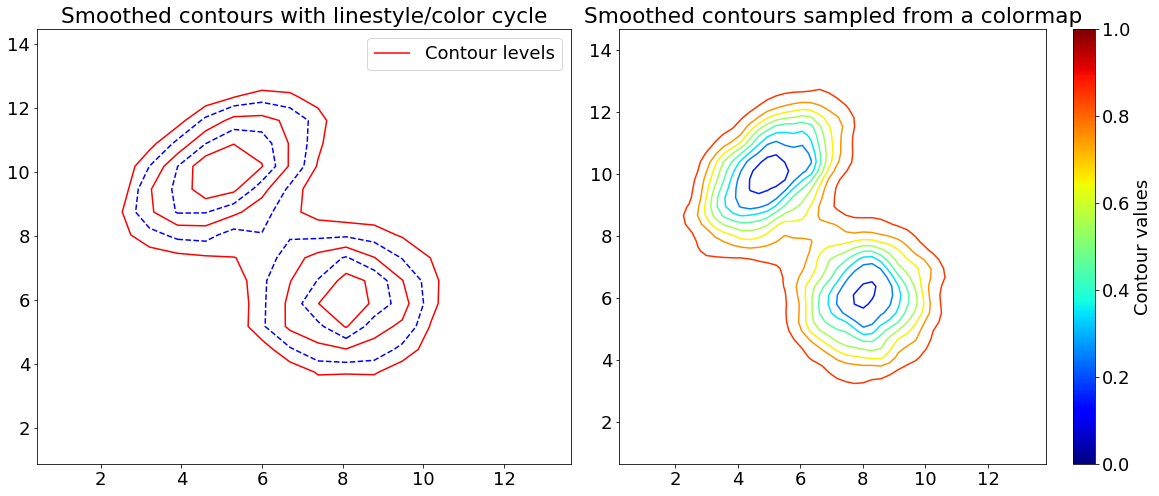

In [18]:
fig, axes = splt.subplots(naxes=2,figsize=(20,8))

splt.contourp(xvals,yvals,bins=[20,20],percent=np.arange(20,95,step=15),
              labels="Contour levels",smooth=0.4,ls=['-','--'],color=['red','blue'],ax=axes[0],
              title="Smoothed contours with linestyle/color cycle")

splt.contourp(xvals,yvals,bins=[50,50],percent=np.arange(15,95,step=10),
              smooth=1.0,ls='-',cmap='jet',ax=axes[1],clabel='Contour values',
              title="Smoothed contours sampled from a colormap")
plt.show()

## splotch.sector()
#### Sector Plots
Sector plots (a.k.a. "pizza slice" plots) are useful for plotting the spatial distribution of data containing one radial axis (r) and another corresponding to the angle (theta).

In [19]:
thetaArr = np.random.uniform(low=30.0,high=150.0,size=1000)
rArr = np.random.gamma(shape=2.0,scale=0.3,size=1000)
cArr = 9.0 + rArr*5 + np.random.normal(0.0,2.0,size=1000)

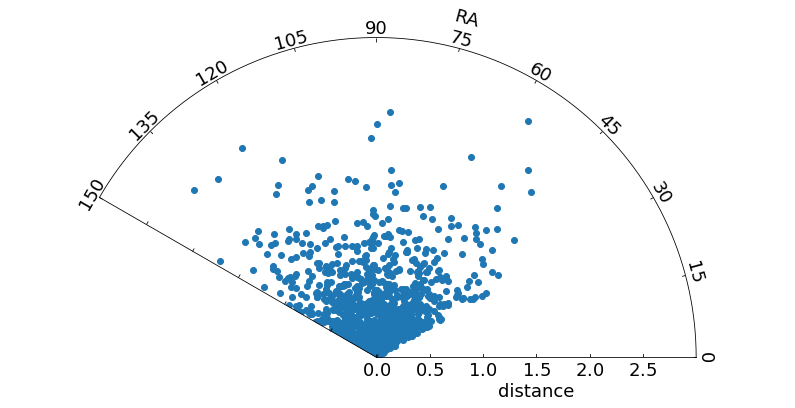

In [20]:
## Basic sector plot defining the theta and radial limits
fig = plt.figure()
splt.sector(theta=thetaArr,r=rArr,thetalim=(0.0,150.0),rlim=(0.0,3.0),
            rlabel="distance",thetalabel="RA")

plt.show()

## splotch.sector()
#### Further controls
The sector plot classifies as a type of scatter plot under the hood and hence the user can parse any `scatter()` specific paramaters into the `splotch.sector()` function. For intance, a third colour axis can be used to indicate the values of a third parameter. There is also the ability to control the spatial orientation of the sector axis itself by using the `rotate` parameter.

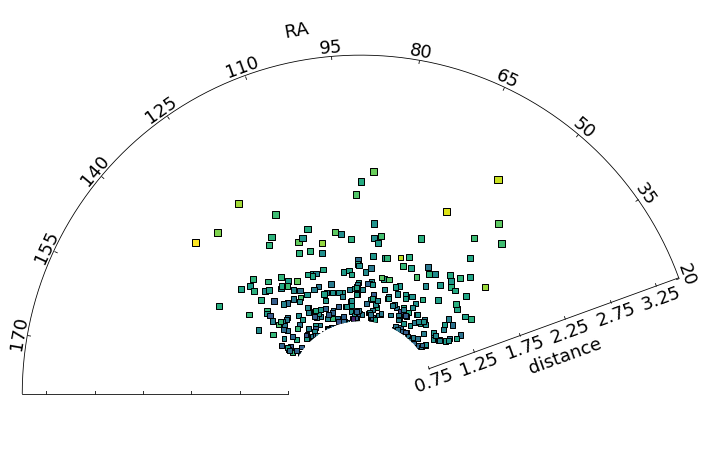

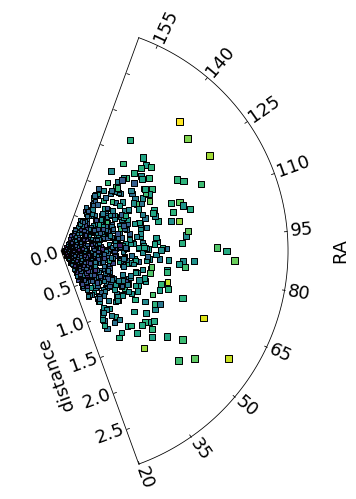

In [21]:
fig = plt.figure(figsize=(12,8))
splt.sector(theta=thetaArr,r=rArr,thetalim=(20.0,180.0),rlim=(0.75,3.5),
            rlabel="distance",thetalabel="RA",
            c=cArr,edgecolor='black',marker='s',s=25*rArr**0.8)

fig = plt.figure(figsize=(6,8))
splt.sector(theta=thetaArr,r=rArr,thetalim=(20.0,160.0),rlim=(0.0,3.0),
            rlabel="distance",thetalabel="RA",rotate=90.0,
            c=cArr,edgecolor='black',marker='s',s=25*rArr**0.8)

plt.show()

### Broken axis plots
Sometimes you wish to plot some data that has a discontinuity at some point but to plot it on one axis would stretch the limits of the axis. Instead, placing a break in the plot can shw both regions of the data without sacrificing the stretch on the limits.

In [22]:
xbroken = np.append(np.arange(0.0,1.0,step=0.02), np.arange(20.0,30.0,step=0.02))
ybroken = xbroken**0.5 + np.random.normal(1.0,0.2,size=len(xbroken))

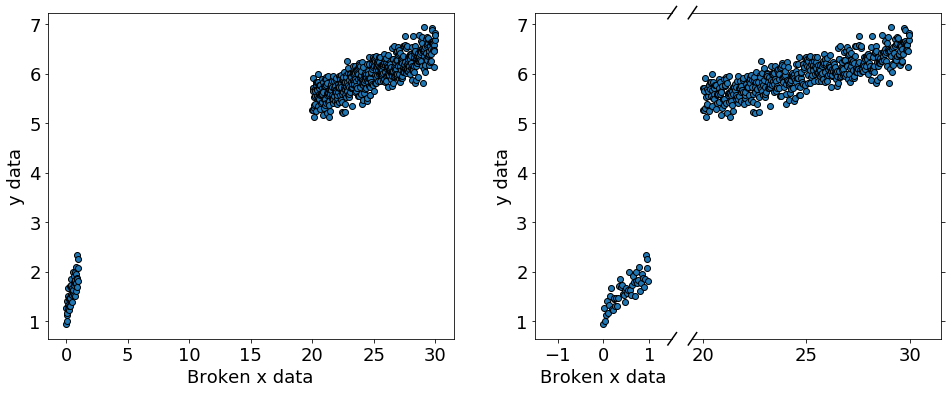

In [23]:
fig, axes = splt.subplots(ncols=2,wspace=0.5,figsize=(16,6))

splt.plot(xbroken,ybroken,ax=axes[0],
          xlabel='Broken x data',ylabel="y data",
          linestyle='',marker='o',mec='black')

splt.brokenplot(xbroken,ybroken,ax=axes[1],xbreak=[1.5,19.5],
                xlabel='Broken x data',ylabel="y data",
                linestyle='',marker='o',mec='black')

plt.show()

### Figure Subplots<br>

#### Basics

The usage subplots within matplotlib is already sufficient to easily create an NxM grid of axis panels within a figure using the `plt.subplots()` function. However, when one wishes to create a set of axes that cannot be represented in the usual NxM layout (e.g. naxes=7), your options are limited. One can instead use the SPLOTCH `subplots()` which, as well as having the base N rows x M cols usage, can allow you to specify an arbitrary number of axes.<br><br>

Here's how the `naxes` feature looks in practice:

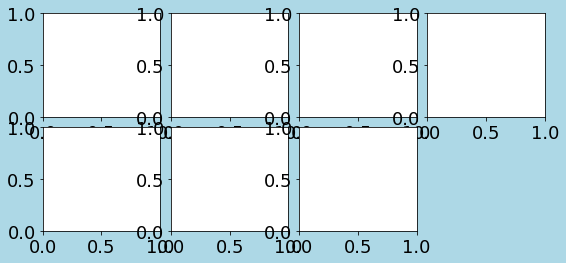

In [24]:
fig, axes = splt.subplots(naxes=7,figsize=(9,4),facecolor='lightblue')
plt.show()

#### Axis alignments with splotch.subplots()
In the case of `naxes=7`, there are various configurations for this particular 2x4 grid that one could imagine placing the 7 axes within. This functionality is controlled using the `ha` (horizontal alignment) and `va` (vertical alignment) parameters. `ha` accepts <i>'left'</i>, <i>'right'</i> and <i>'centre'</i>, whereas `va` accepts <i>'top'</i>, <i>'bottom'<i> and </i>'middle'</i>.<br><br>

Here are a few examples of axis alignments:

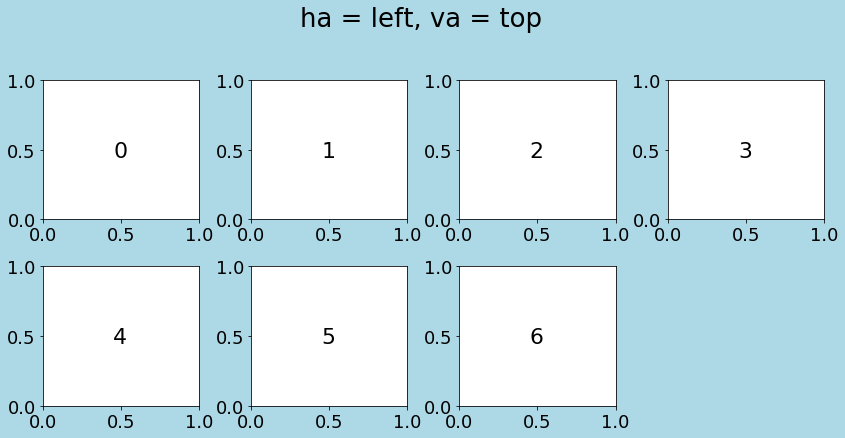

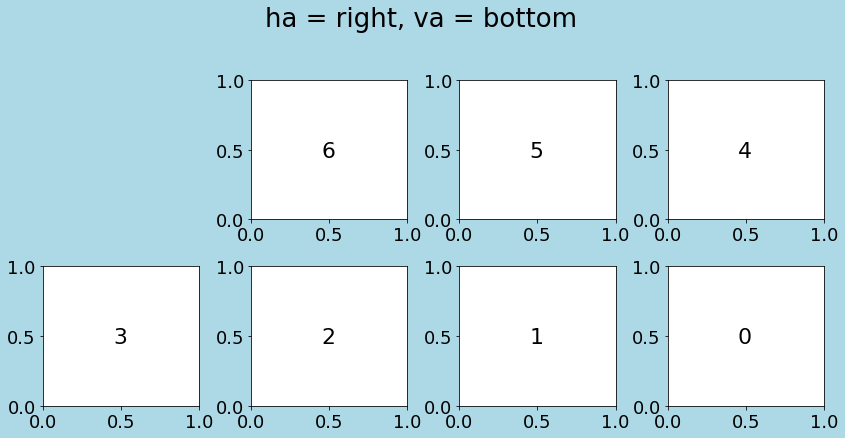

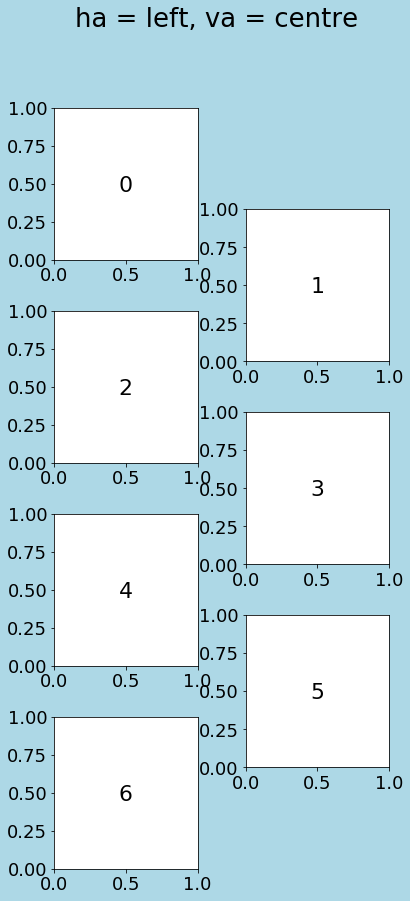

In [25]:
# horizontal alignment: left;  vertical alignment: top (Defaults)
fig, axes = splt.subplots(naxes=7,ha='left',va='top',figsize=(14,6),hspace=1,wspace=1,facecolor='lightblue')  
fig.suptitle("ha = left, va = top",fontsize=26,y=1.05)
for ii in range(len(axes)): axes[ii].text(0.45,0.45,ii,fontsize=22)

# horizontal alignment: right;  vertical alignment: bottom
fig, axes = splt.subplots(naxes=7,ha='right',va='bottom',figsize=(14,6),hspace=1,wspace=1,facecolor='lightblue') 
fig.suptitle("ha = right, va = bottom",fontsize=26,y=1.05)
for ii in range(len(axes)): axes[ii].text(0.45,0.45,ii,fontsize=22)

# horizontal alignment: centre;  vertical alignment: bottom (with two columns)
fig, axes = splt.subplots(naxes=7,ncols=2,ha='left',va='centre',figsize=(6,14),hspace=1,wspace=1,facecolor='lightblue') 
fig.suptitle("ha = left, va = centre",fontsize=26)
for ii in range(len(axes)): axes[ii].text(0.45,0.45,ii,fontsize=22)

plt.show()

#### Notes on splotch.subplots()
Note that the alignments chosen also impact the order in which each axis instance are arranged within the `axes` array that is returned. Whilst the user can specify any combination of `naxes`, `nrows` and `ncols`, the function will raise an exception if `nrows*ncols != naxes`. The only combination of `ha` and `va` not allowed is where both are <i>'centre'</i>.

## Working with Text in SPLOTCH
Text within plots is itself its own separate element and as such SPLOTCH provides the `adjust_text()` function to control it. This function can make one (or many) choices of text instances to change the text properties for. Currently, the available text instance specified using `which` are:
	* 'x'|'xlabel'   : x-axis label 
	* 'y'|'ylabel'   : y-axis label 
	* 't'|'title'    : Title
	* 's'|'suptitle' : Super-title (Not implemented)
	* 'l'|'legend'   : Legend text
	* 'c'|'colorbar' : Color bar (Limited to a single colorbar)
	* 'T'|'text'     : Text objects
	* 'a'|'all'      : All instances of all the above

No handles with labels found to put in legend.


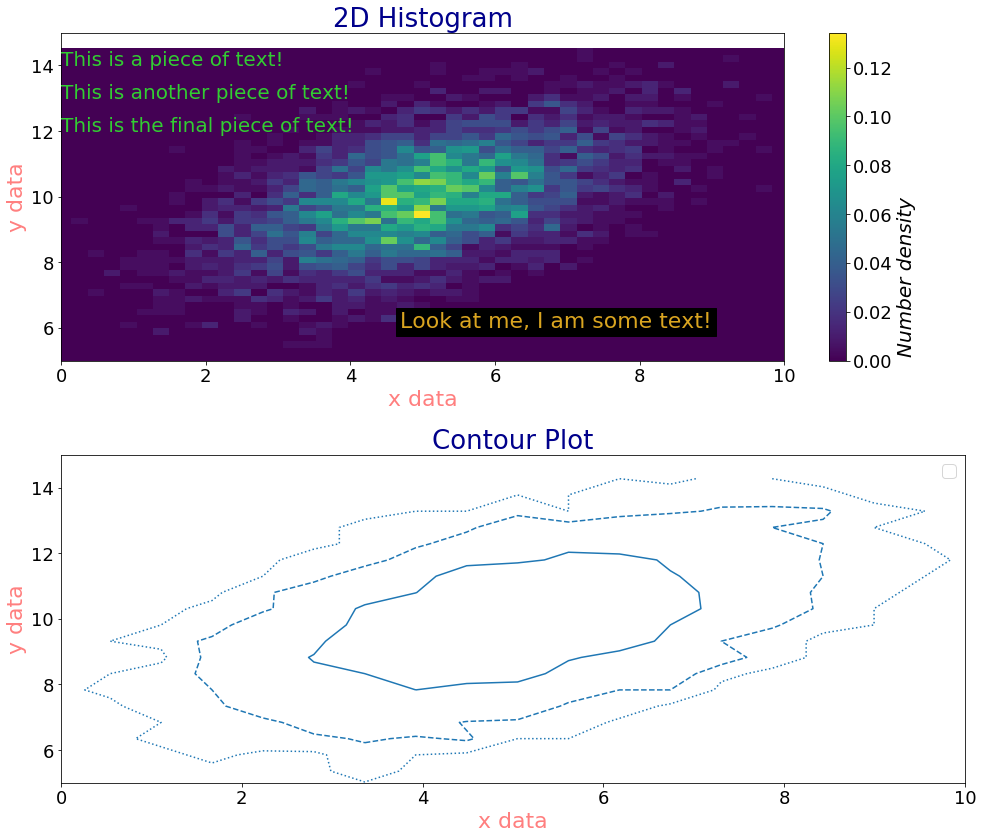

In [26]:
# Create some data representing two multi-variate 2D Gaussians
num = 10000
xvals, yvals = np.random.multivariate_normal([5,10],[[2,1],[1,2]],size=num//2).T

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(14,12))

splt.hist2D(xvals, yvals, xlim=(0,10), ylim=(5,15), bins=50, 
            xlabel="x data",ylabel="y data",clabel="Number density",title="2D Histogram",
            ax=axes[0])

splt.contourp(xvals,yvals,percent=[68.3,95.5,99.7],bins=[20,20],lab_loc=1,
              xlim=(0,10), ylim=(5,15),xlabel="x data",ylabel="y data",title="Contour Plot",
              ax=axes[1])

text1 = axes[0].text(0,14,"This is a piece of text!")
text2 = axes[0].text(0,13,"This is another piece of text!")
text3 = axes[0].text(0,12,"This is the final piece of text!")

text4 = axes[0].text(9,6,"Look at me, I am some text!",ha='right')

# Adjust x and y labels on all axes
splt.adjust_text(['x','y'],fontsize=22,color='red',alpha=0.5,ax=axes)

# Adjust title font on only one axis
splt.adjust_text('t',fontsize=26,ax=axes,color='darkblue')

# Adjust colorbar font
splt.adjust_text('c',fontsize=20,fontstyle='italic',fontvariant='small-caps',
                 horizontalalignment='right')

# Adjust labels in legend
splt.adjust_text('l',fontsize=20,color='purple',backgroundcolor='lightgrey',ax=axes[1])

# Adjust all text instances in an axis.
splt.adjust_text('T',fontsize=20,color='limegreen',ax=axes[0])

#... or adjust a specific Text object
splt.adjust_text(text4,fontsize=22,color='goldenrod',backgroundcolor='black',ax=axes[0])

# All of the above could be achieved in a single-line if desired
#splt.adjust_text(['x','y','t','c','l','T',text4],fontsize=[22,22,26,20,20,20,22],
#                 color=['red','red','darkblue','black','black','green','goldenrod'],ax=axes)

fig.tight_layout()
plt.show()

## Using plot_kw and \*\*kwargs
One of the core features of SPLOTCH is that it is a wrapper around matplotlib.pyplot so the user has access to not only the SLOTCH-specific parameters (e.g. `xlabel`, `title`, `grid`, etc.), they may also access all underlying pyplot parameters by using keyword arguments (kwargs). One can use the `plot_kw` parameter to parse a dictionary of `pyplot` specific arguments that will be fed into the corresponding matplotlib plotting function. Alternatively, simply specifying the parameters as they are named within pyplot functions will be clump them together into a kwargs dictionary that acts the same as `plot_kw`.

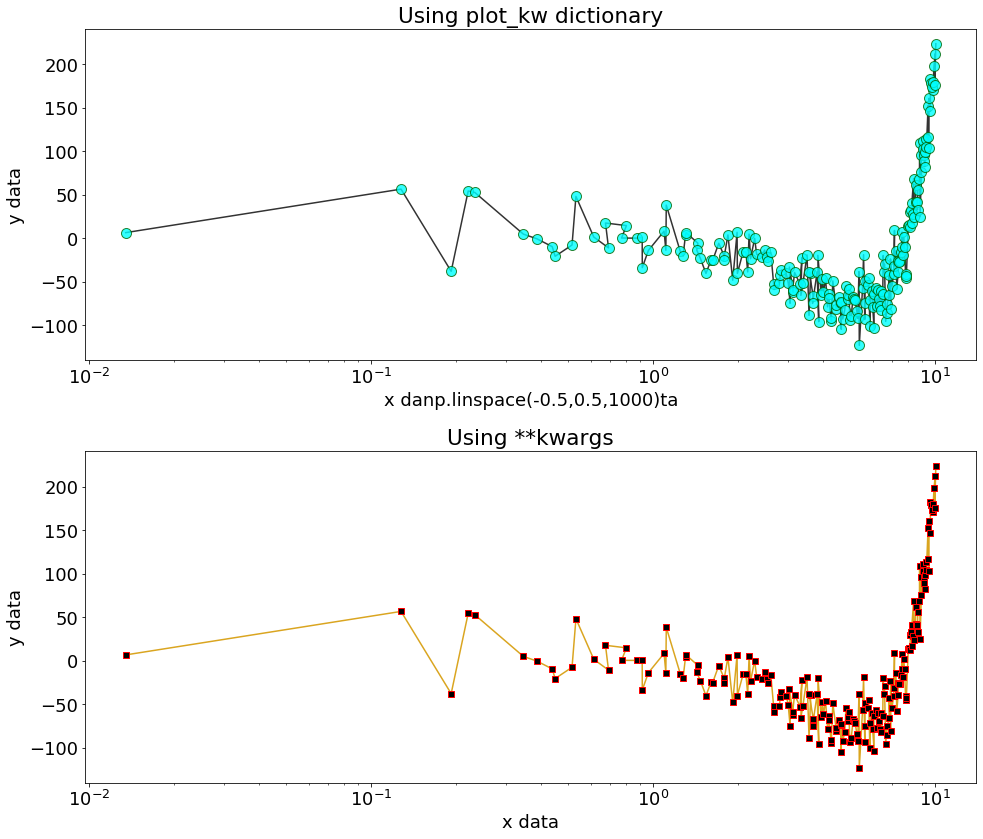

In [27]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(14,12))

# Basic plot explicitly using plot_kw dictionary
kw_dict = dict(marker='o',markersize=10,markerfacecolor='cyan',
               markeredgecolor='darkgreen',color='black',alpha=0.8)

# feed kw_dict into any splotch function
splt.plot(x=xdata,y=ydata,xlog=True,ax=axes[0],
          xlabel="x danp.linspace(-0.5,0.5,1000)ta",ylabel="y data",title="Using plot_kw dictionary",
          plot_kw=kw_dict)


# Basic plot *implicitly* referencing pyplot parameters which will be given as keyword arguments
splt.plot(x=xdata,y=ydata,xlog=True,ax=axes[1],
          xlabel="x data",ylabel="y data",title="Using **kwargs",
          marker='s',markersize=6,markerfacecolor='black',markeredgecolor='red',color='goldenrod',alpha=1)

plt.tight_layout()
plt.show()

### A complex plot using \*\*kwargs
The full potential of using kwargs to specify plotting parameters can be seen in the example scatterplot below.

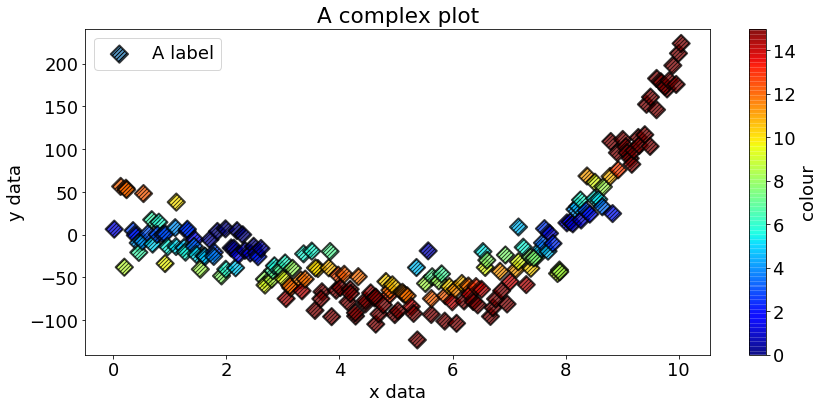

In [28]:
fig, axes = plt.subplots()

### Using unnecessarily many kwargs to make a plot.
splt.scatter(x=xdata,y=ydata,c=cdata,cmap='jet',vmin=0,vmax=15,plabel="A label",
             xlabel="x data",ylabel="y data",clabel='colour',title="A complex plot",
             s=150, marker='D', edgecolors='black',linewidths=2,hatch='//////',
             alpha=0.75,plotnonfinite=True)

plt.show()